In [13]:
import pandas as pd 

### Getting the data

In [14]:
portfolio_returns = pd.read_csv("C:/Users/OMAR/Desktop/Randa/Investment-Management-with-Python-and-ML/data/Portfolios_Formed_on_ME_monthly_EW.csv"
                                , header=0
                                , index_col=0 
                                , parse_dates=True
                                , na_values=-99.99)
portfolio_returns.head()

C:\Users\OMAR\AppData\Local\Temp\ipykernel_6252\2526051315.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  portfolio_returns = pd.read_csv("C:/Users/OMAR/Desktop/Randa/Investment-Management-with-Python-and-ML/data/Portfolios_Formed_on_ME_monthly_EW.csv"


,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


### Price change %

<Axes: >

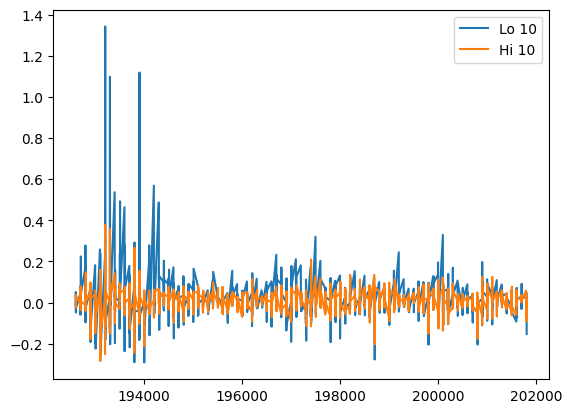

In [15]:
# return percentage converted 

to_select = ['Lo 10', 'Hi 10']
returns_to_check = portfolio_returns[to_select]/100
returns_to_check.plot()

In [16]:
returns_to_check.index = (pd.to_datetime(returns_to_check.index, format='%Y%m')).to_period("M")
returns_to_check.head()

,Lo 10,Hi 10
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


### Drawdown calculation 

In [17]:
## compute wealth index 
## compute previous peaks 
## compute drawdown - which is the wealth value as a percentage of the previous peak 


#### Wealth index

##### calculation 

In [21]:
wealth_index = 1000*(1+returns_to_check['Hi 10']).cumprod()
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: Hi 10, dtype: float64

##### plot

<Axes: >

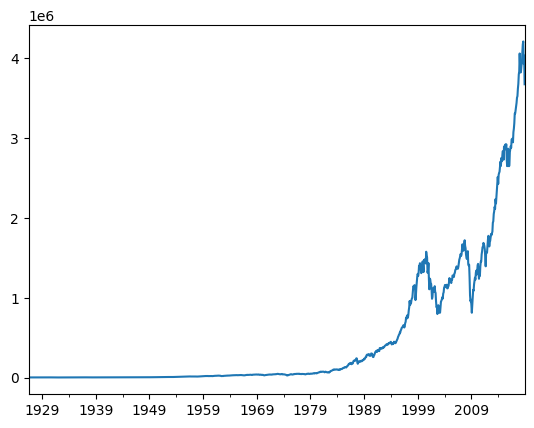

In [62]:
wealth_index.plot()

#### Previous peak 

##### plot

<Axes: >

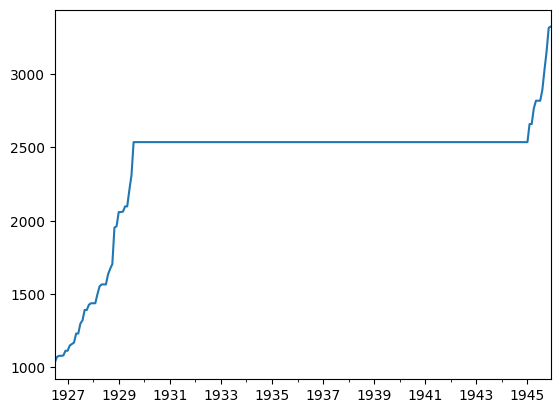

In [54]:
previous_peak=wealth_index.cummax()
previous_peak['1920':'1945'].plot()

### Drawdown 

#### Plot 

<Axes: >

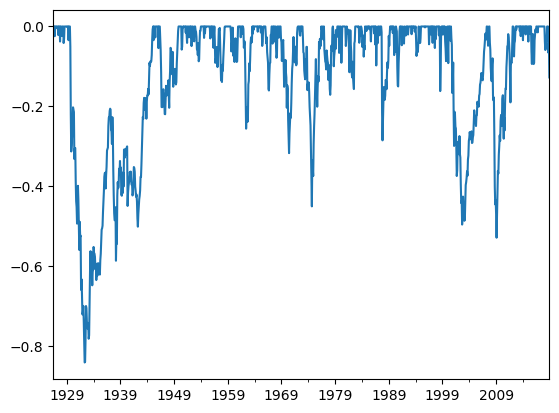

In [31]:
drawdown = wealth_index/previous_peak-1
drawdown.plot()

#### Definition 

In [52]:
# The largest drop in value from a peak to a subsequent trough has been 50%.
# Since 1975, the value of the investment or index dropped by half before recovering.

drawdown['1975':].min(), drawdown['1975':].idxmin()

(np.float64(-0.5280945042309304), Period('2009-02', 'M'))

#### function


In [56]:
def drawdown(return_series: pd.Series):
    """
    Takes a time series of asset returns 
    computes and returns a DataFrame that contains:
    wealth index
    previous peaks 
    percent drawdowns
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns=wealth_index/previous_peaks-1

    return pd.DataFrame({
        "Wealth":wealth_index,
        "Peaks":previous_peaks,
        "Drawdown":drawdowns
    })

<Axes: >

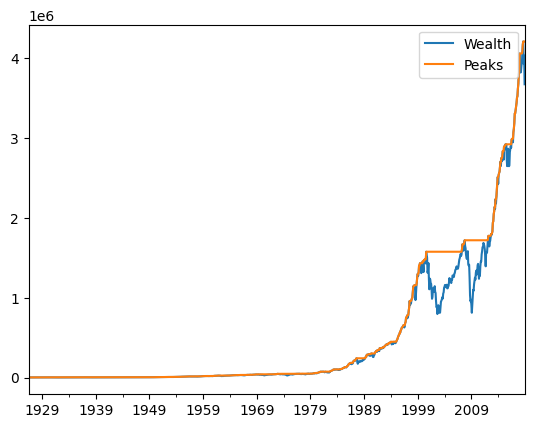

In [61]:
drawdown(returns_to_check['Hi 10'])[['Wealth', 'Peaks']].plot()

#### To '1950' plots

<Axes: >

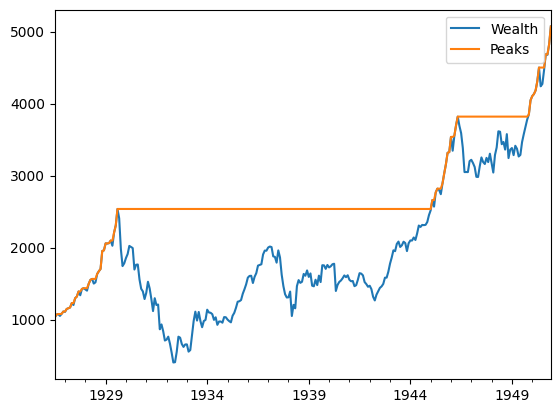

In [63]:
drawdown(returns_to_check['Hi 10'][:'1950'])[['Wealth', 'Peaks']].plot()

<Axes: >

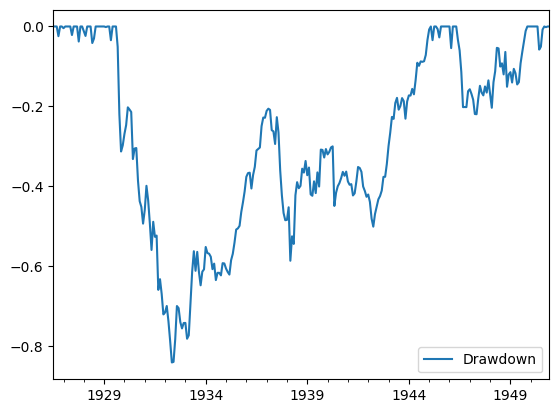

In [64]:
drawdown(returns_to_check['Hi 10'][:'1950'])[['Drawdown']].plot()